# Votre mission

Dans cette activité, vous allez implémenter les opérations de filtrage pour débruiter des images avec les filtres étudiés dans le chapitre précédent : 
* moyenneur
* gaussien
* médian

L’application d’un filtre se fera alors à l’aide d’une fonction qui prend en entrée une image et les paramètres de ce filtre (par exemple, la taille du noyau pour le filtre moyenneur). Vous pouvez vous inspirer des méthodes du module ImageFilter de Pillow.

Vous comparerez ensuite les performances de ces trois filtres. Pour cela, vous les appliquerez sur ces images bruitées et analyserez qualitativement la qualité de l’image filtrée. Trois types de bruits ont été considérés : 
* bruit gaussien
* speckle
* “poivre et sel”

Vous étudierez également l’influence de chaque paramètre des filtres sur l’image débruitée en faisant varier leur valeur.

# Livrables

Vous devrez charger sur la plateforme un .zip contenant :

* Un classeur iPython où les trois filtres sont implémentés et appliqués aux images bruitées (en faisant varier les paramètres)
* Un court rapport dans lequel vous expliquerez les avantages et inconvénients de chacun des trois filtres

In [35]:
import os
import scipy
import scipy.ndimage
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

In [36]:
# Lieu où se trouve le fichier
_DOSSIER = '/home/toni/Bureau/images/'

# Manipulations d'histogrammes

In [37]:
def histogrammes():
    """
    Manipulation des histogrammes
    """
    
    images = os.listdir(_DOSSIER)

    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    list_plt = [ax1, ax2, ax3, ax4]

    for fichier, num_plt in zip(images, list_plt):

        plt.subplot(num_plt)

        # Charger l'image comme matrice de pixels
        img = np.array(Image.open(_DOSSIER + fichier))

        # Générer et afficher l'histogramme
        # Pour le normaliser : argument density=True dans plt.hist
        # Pour avoir l'histogramme cumulé : argument cumulative=True
        n, bins, patches = plt.hist(img.flatten(), bins=range(256))

        plt.xlabel('Niveau de gris')
        plt.ylabel('Nombre de pixels')
        plt.title(fichier)

    plt.show()

# Filtre de Gauss

In [38]:
def fonction_gauss(img, param1):
    """
    Fonction de filtre
    """

    # Application du filtre
    img_modified = scipy.ndimage.filters.gaussian_filter(img, sigma=param1)
    
    return img_modified

# Filtre median

In [39]:
def fonction_median(img, param1):
    """
    Fonction de filtre
    """

    # Application du filtre
    img_modified = scipy.ndimage.median_filter(img, size=param1)
    
    return img_modified

# Filtre moyenne

In [40]:
def fonction_moyenne(img, param1):
    """
    Fonction de filtre
    """

    # Application du filtre
    img_modified = scipy.ndimage.generic_filter(img, function=np.median, size=param1)
    
    return img_modified

# Fonction qui applique tous les filtres

In [41]:
def fonction_globale(fichier, param):
    """
    Fonction qui applique tous les filtres
    """
    
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    # Charger l'image comme matrice de pixels
    plt.subplot(ax1)
    img = np.array(Image.open(_DOSSIER + fichier))
    plt.title('Originale ' + fichier)
    plt.imshow(img, cmap = plt.get_cmap('gray'))

    # Filtres
    plt.subplot(ax2)
    img_gauss = fonction_gauss(img, param)
    plt.title('Gauss ' + str(param) + '_' + fichier)
    plt.imshow(img_gauss, cmap = plt.get_cmap('gray'))

    plt.subplot(ax3)
    img_median = fonction_median(img, param)
    plt.title('Median ' + str(param) + '_' + fichier)
    plt.imshow(img_median, cmap = plt.get_cmap('gray'))

    plt.subplot(ax4)
    img_moy = fonction_moyenne(img, param)
    plt.title('Moyenne ' + str(param) + '_' + fichier)
    plt.imshow(img_moy, cmap = plt.get_cmap('gray'))

    plt.show()

# Fonction principale

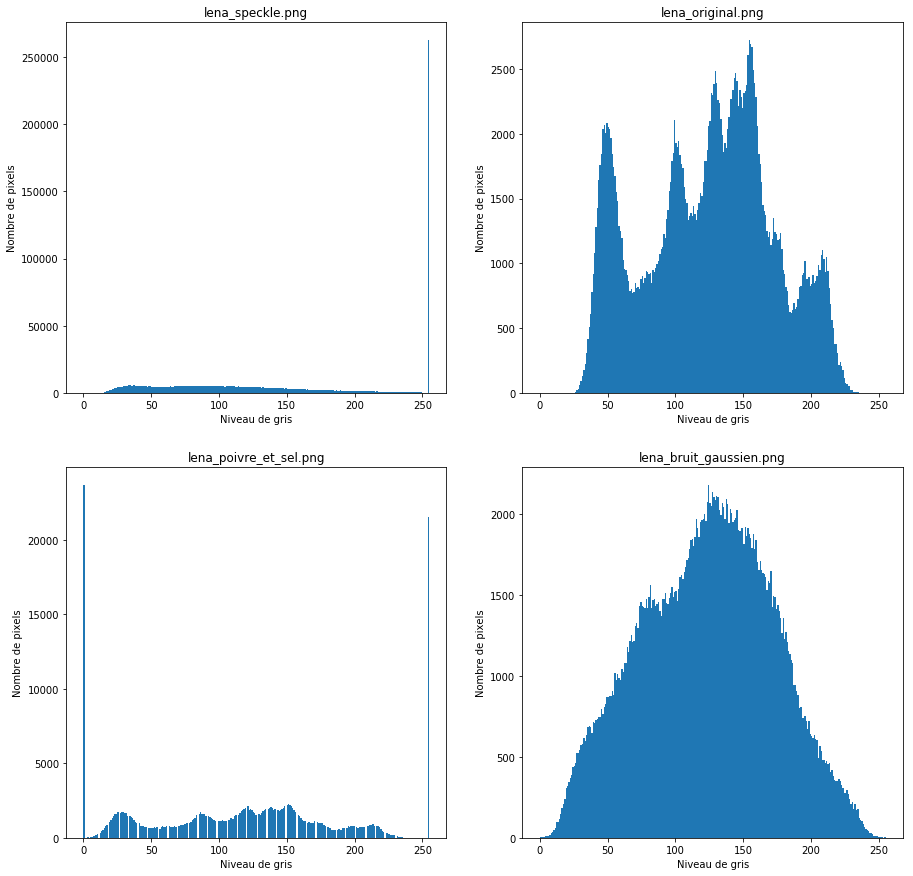

In [42]:
# On regarde les histogrammes avant de commencer
histogrammes()

In [48]:
# Liste des paramètres
fichier = os.listdir(_DOSSIER)

params = [3, 5]

# Fichier lena_speckle.png

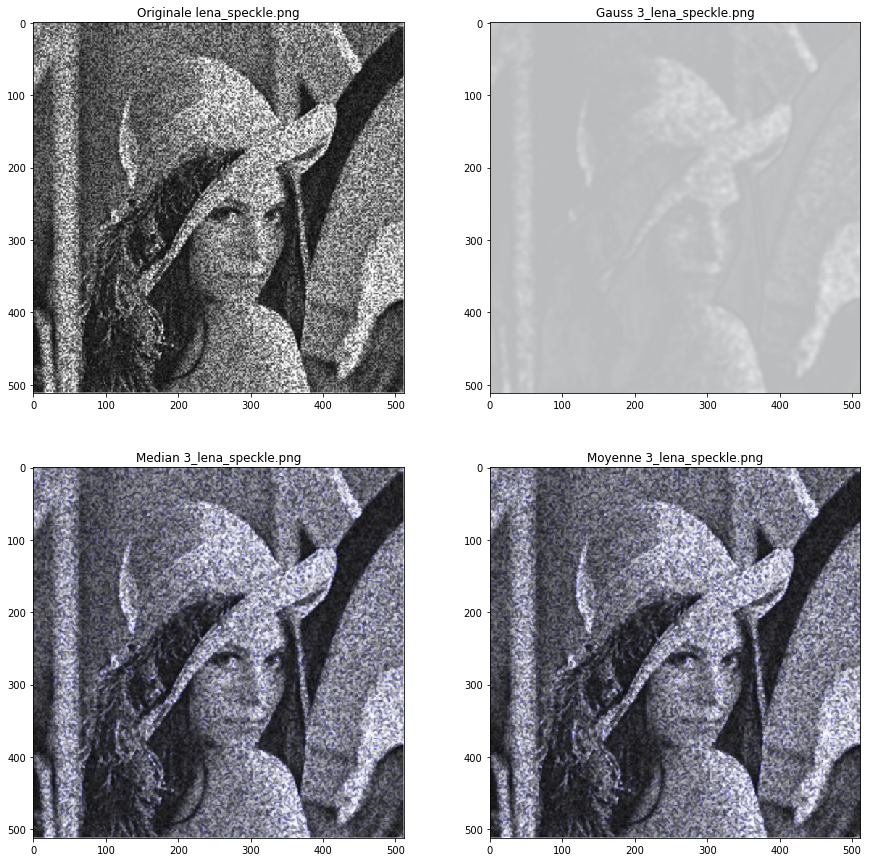

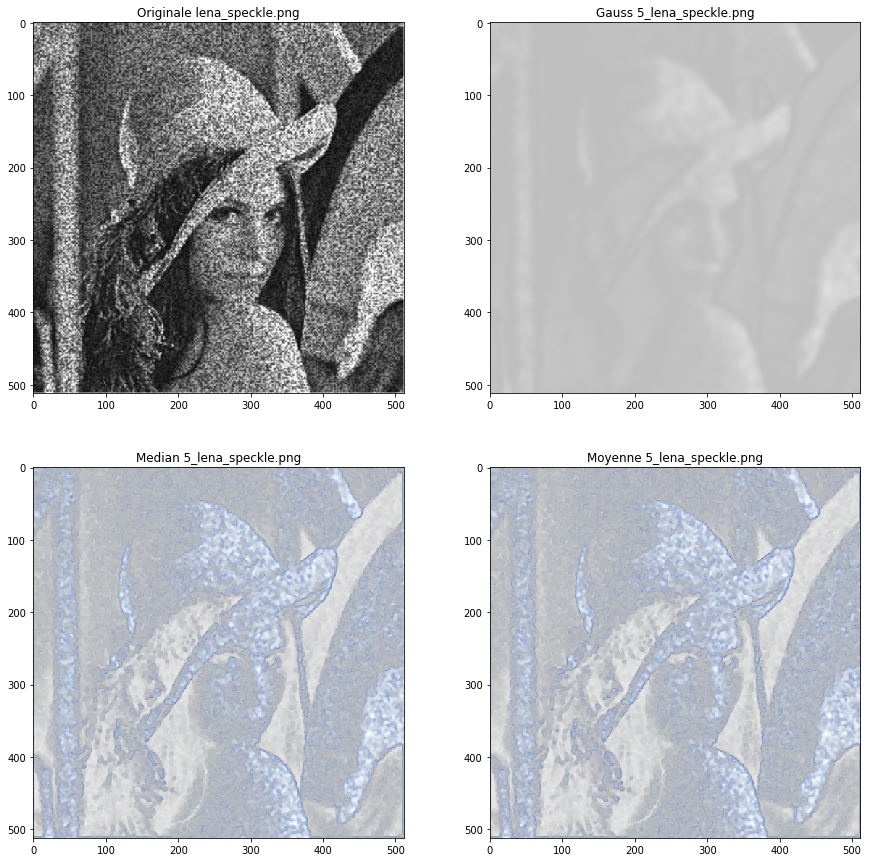

In [49]:
for i in params:
    fonction_globale(fichier[0], i)

Aucun filtre avec les paramètres selectionnés n'est efficace

# Fichier lena_originale.png

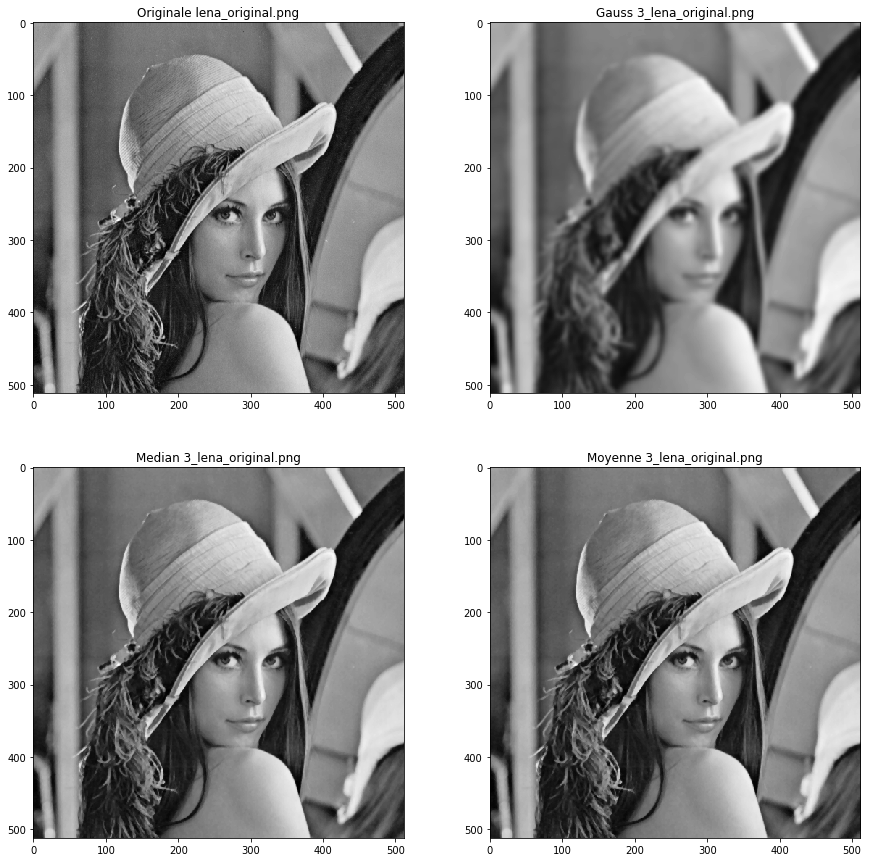

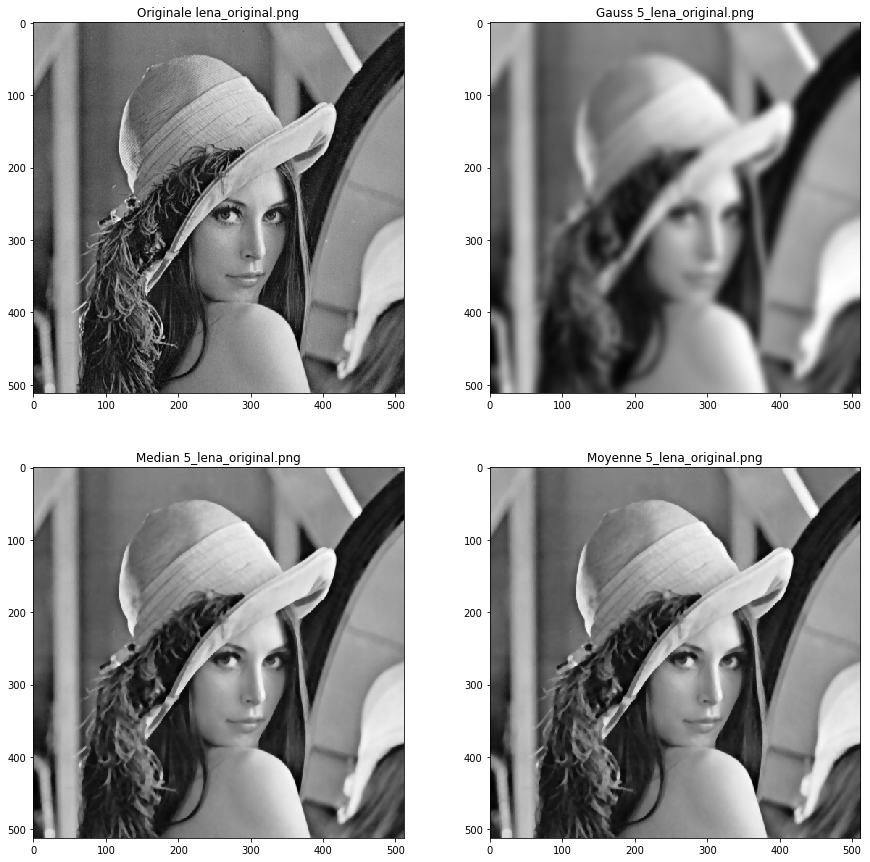

In [50]:
for i in params:
    fonction_globale(fichier[1], i)

Il s'agit d'une baseline, aucun commentaire n'est nécessaire

# Fichier lena_poivre_et_sel.png

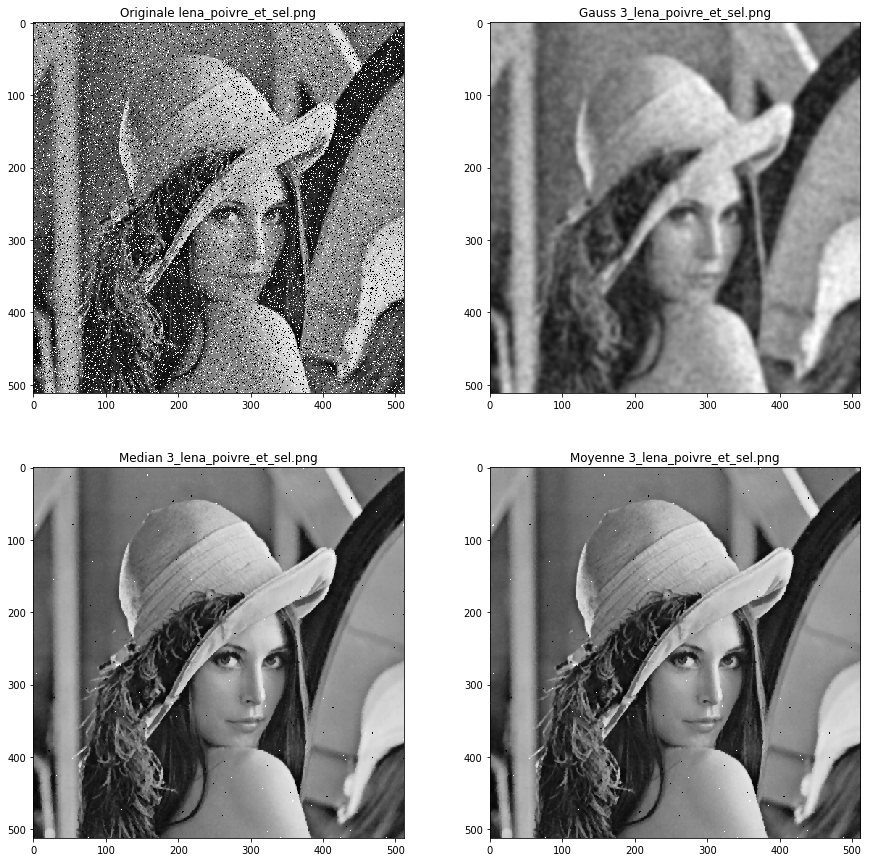

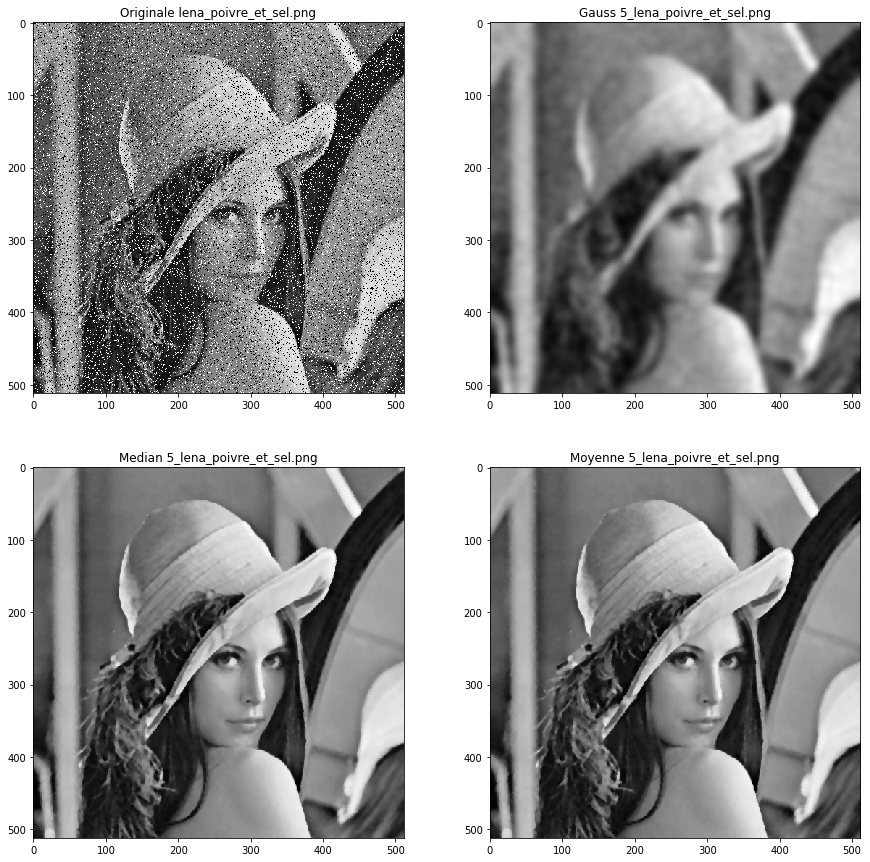

In [51]:
for i in params:
    fonction_globale(fichier[2], i)

Les filtres median et moyenne ont bien fonctionnés. Avec une taille de 3, l'image est plus nette mais des mauvais points subsistent. Avec la taille de 5, aucun mauvais point ne reste mais l'image est plus floue.

# Fichier lena_bruit_gaussien.png

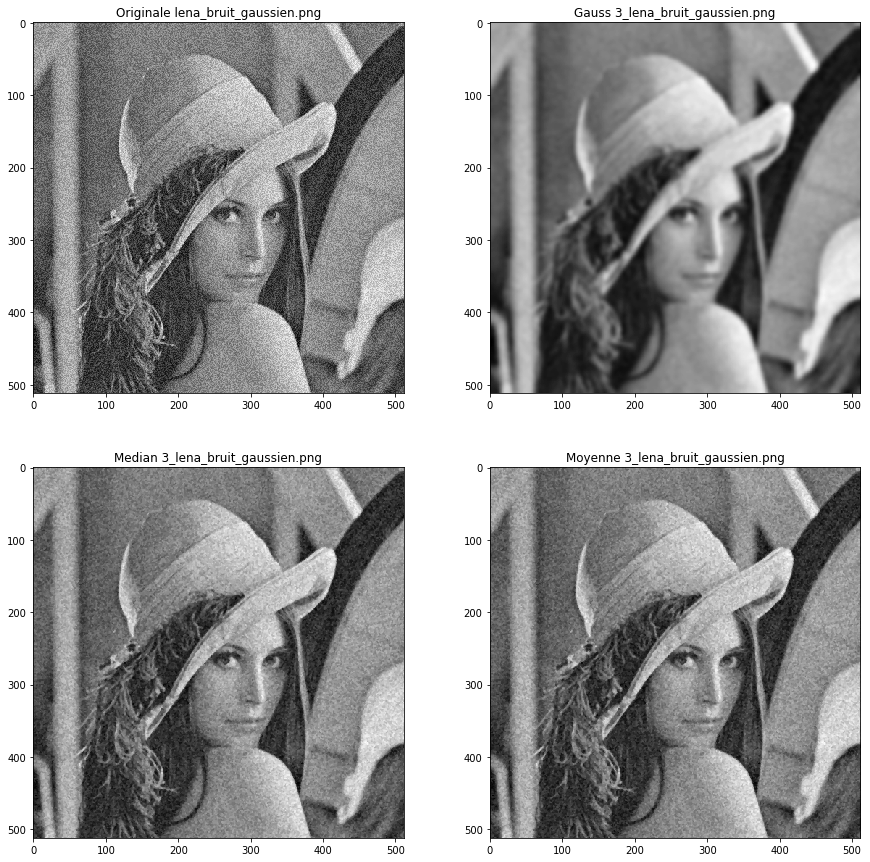

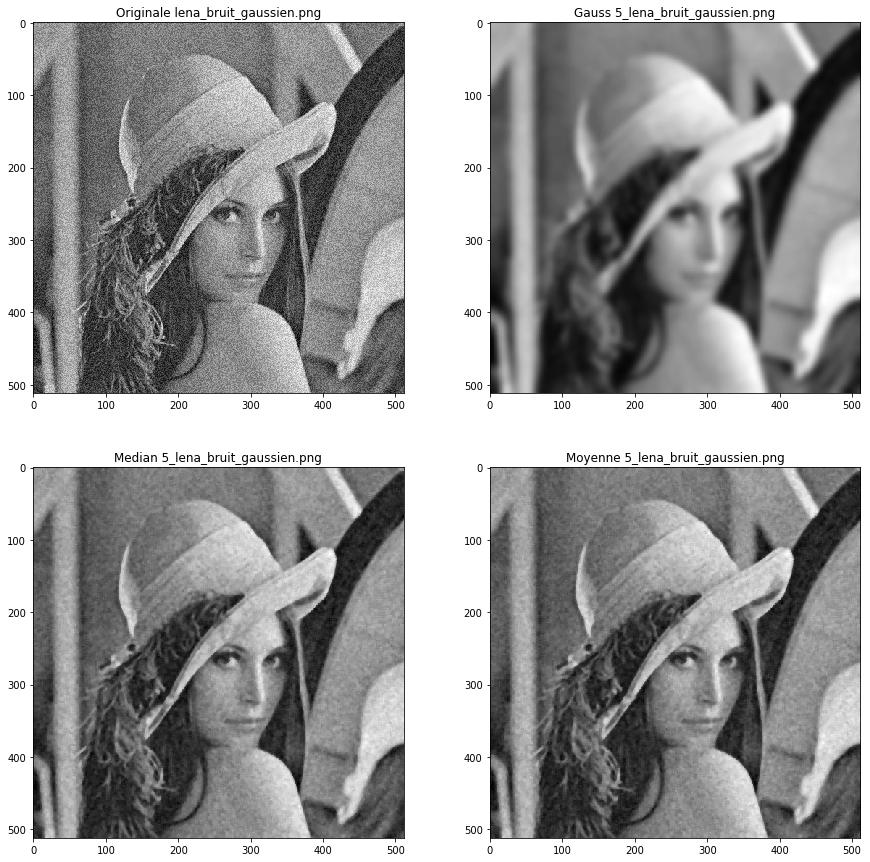

In [52]:
for i in params:
    fonction_globale(fichier[3], i)

Tous les filtres sont plus au moins efficaces.

# Rapport

Le filtrage constitue un volet important en traitement d'images, et un de ses objectifs principaux est de nettoyer l'image en éliminant le plus de bruit possible. 

Il existe différentes techniques de filtrage selon le type de bruit à atténuer. Le lissage par moyennage utilise un filtre linéaire et fait partie, en ce sens, de la classe de filtrage la plus simple. Les deux types de filtres linéaires les plus populaires sont les filtres moyenneurs et les filtres gaussiens, que nous allons étudier maintenant. 

# Conclusions

__Filtre moyenneur: moyenne des voisins__

* Avantage

Très simple et rapide 

* Inconvénient 

Peu robuste 

__Filtre de Gauss__

* Avantage 

Filtre paramétrable (sigma)

Adaptable au problème 

* Inconvénient 

Complexité (calcul flottant et non entier) 

__Filtre médian__

* Avantage 

Résistance accru au bruit 

* Inconvénient

Algorithme naïf 